### CS2101 - Programming for Science and Finance
Prof. Götz Pfeiffer<br />
School of Mathematical and Statistical Sciences<br />
University of Galway

# Computer Lab 7

Provide answers to the problems in the boxes provided.  Partial marks will be awarded for
participation and engagement.

**Important:** When finished, print this notebook into a **pdf** file and submit this pdf to
**canvas**.  (Submissions in other formats will not be accepted.)

**Deadline** is a week on Friday, at 5pm.

## Setup

This is a `jupyter` notebook.   You can open and interact
with the notebook through one of sites recommended at
its [github repository](https://github.com/gpfeiffer/cs2101).

Or, you can
install and use `jupyter` as a `python` package on your own laptop or PC.  

* First, import some packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## 1. Numerical Differentiation.

1. As the derivative of a function $f \colon D \to \mathbb{R}$ (for some $D \subseteq \mathbb{R}$) at a point $x \in D$ is given by the limit 
  $$
  f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x-h)}{2h}
  $$
  we can use
  $$
  f'(x) \approx \frac{f(x+h) - f(x-h)}{2h}
  $$
  for small values of $h$ as an approximation of the value of the derivative of $f$ at $x$.  Write a function `derivative` that takes a function $f$ and a small value $h$ as input and the computes and returns the derivative $f'$ as a function, using the above approximation.  Can you use a `lambda` expression to avoid having to invent a variable name for the derivative?

In [4]:
def derivative(f, h):
    return lambda x: (f(x + h) - f(x - h)) / (2 * h)

2. Check, perhaps with $h = 10^{-5}$, that your function computes $-\sin(x)$ as the derivative of $\cos(x)$ by plotting both your derivative and the $-\sin(x)$ function over the interval $[0, 2\pi]$.

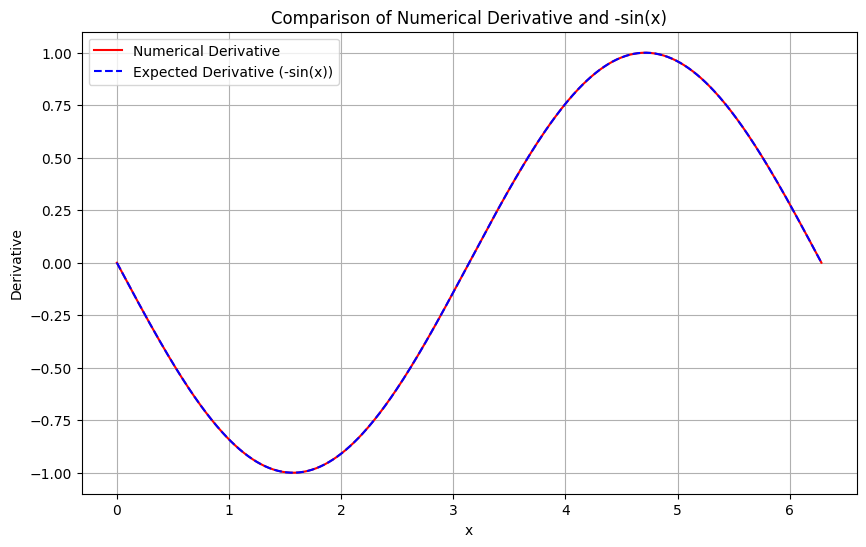

In [22]:
f = np.cos
expcted = lambda x: -np.sin(x)

h = 1e-5
numerical = derivative(f, h)

# Define the interval [0, 2π]
x_values = np.linspace(0, 2 * np.pi, 500)
numerical_derivative_values = numerical(x_values)
expected_values = expcted(x_values)

# Plot both the numerical derivative and the expected derivative
plt.figure(figsize=(10, 6))
plt.plot(x_values, numerical_derivative_values, label="Numerical Derivative", c = "r")
plt.plot(x_values, expected_values, label="Expected Derivative (-sin(x))", linestyle="--", c = "b")
plt.xlabel("x")
plt.ylabel("Derivative")
plt.title("Comparison of Numerical Derivative and -sin(x)")
plt.legend()
plt.grid()
plt.show()

3. Using your `derivative` function, plot $f(x) = 3x^4 - 4x^3 - 12x^2 + 5$ (over the interval $[-2, 3]$), its first derivative $f'$ (over the interval $[-1.4,2.3]$) and its second derivative $f''$ (over the interval $[-1,1.6]$).

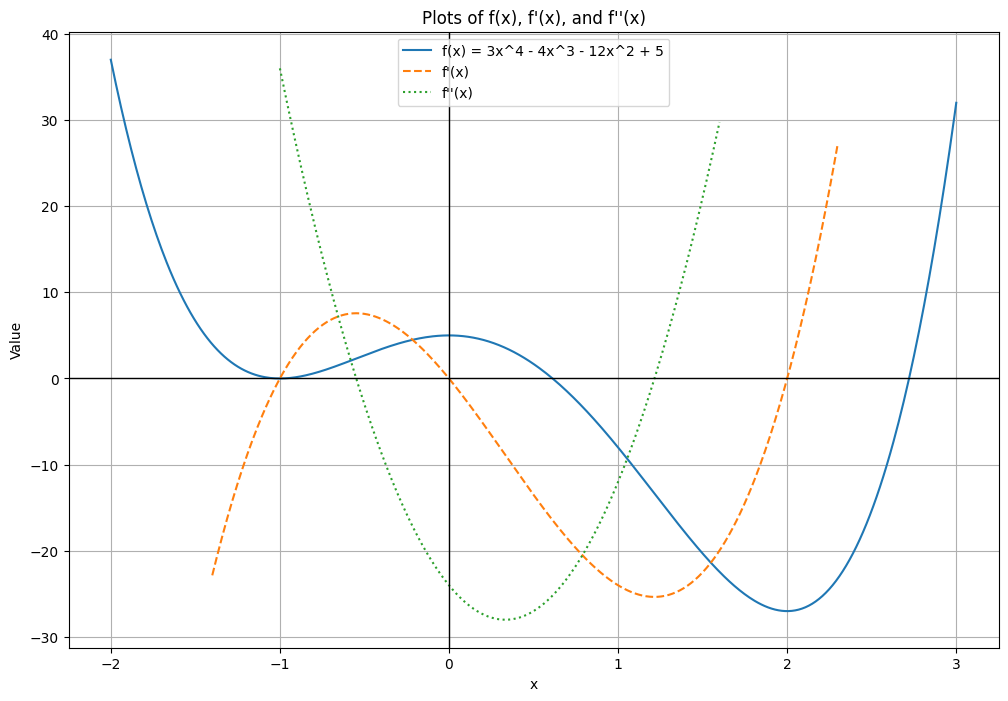

In [26]:
def f(x):
    return 3 * x**4 - 4 * x**3 - 12 * x**2 + 5

# Compute the first derivative f' using the `derivative` function
h = 1e-5
f_prime = derivative(f, h)

# Compute the second derivative f'' using the `derivative` function
f_double_prime = derivative(f_prime, h)


# Define the intervals for plotting
x_f = np.linspace(-2, 3, 500)  # Interval for f(x)
x_f_prime = np.linspace(-1.4, 2.3, 500)  # Interval for f'(x)
x_f_double_prime = np.linspace(-1, 1.6, 500)  # Interval for f''(x)

# Compute values for plotting
f_values = f(x_f)
f_prime_values = f_prime(x_f_prime)
f_double_prime_values = f_double_prime(x_f_double_prime)

# Plot f(x), f'(x), and f''(x) on the same plot
plt.figure(figsize=(12, 8))

# Plot f(x)
plt.plot(x_f, f_values, label="f(x) = 3x^4 - 4x^3 - 12x^2 + 5", linestyle='-')

# Plot f'(x)
plt.plot(x_f_prime, f_prime_values, label="f'(x)", linestyle='--')

# Plot f''(x)
plt.plot(x_f_double_prime, f_double_prime_values, label="f''(x)", linestyle=':')

# Add vertical and horizontal lines at x = 0 and y = 0
plt.axhline(0, color='black', linestyle='-', linewidth=1)
plt.axvline(0, color='black', linestyle='-', linewidth=1)

# Add labels, title, and legend
plt.xlabel("x")
plt.ylabel("Value")
plt.title("Plots of f(x), f'(x), and f''(x)")
plt.grid()
plt.legend()
plt.show()

## 2.  Newton's Method

1.  Using your function `derivative`, implement Newton's method `newton` from the lectures.

In [28]:
def newton(f, eps, h):
    fprime = derivative(f, h)

    def solve(x):
        while abs(f(x)) > eps:
            x = x - f(x) / fprime(x)
        return x
    return solve

2.  Use your implementation of Newton's method to find solutions to the equation $\cos(x) = \sqrt{2}/2$, say for $50$ different starting values $x_0$ in the interval $[1,11]$. Check that all your solutions are integer multiples of $\pi/4$.  Modulo $8$, which integers do occur? (And which ones don't?)

In [34]:
# Parameters
eps = h = 1e-5
f = lambda x: np.cos(x) - np.sqrt(2) / 2

# Define 50 starting values in the interval [1, 11]
x0_values = np.linspace(1, 11, 50)

# Use Newton's method to find solutions
solutions = []
for x0 in x0_values:
    root = newton(f, eps, h)(x0)  # Use the Newton solver
    if root is not None:
        # Round the root to nearest multiple of pi/4
        root = round(root / (np.pi / 4)) * (np.pi / 4)
        solutions.append(root)

# Remove duplicates and modulo 8 results
unique_solutions = sorted(set(solutions))
integer_multiples_mod_8 = [int(round(sol / (np.pi / 4))) % 8 for sol in unique_solutions]

In [35]:
unique_solutions, integer_multiples_mod_8

([-19.634954084936208,
  -13.351768777756622,
  -0.7853981633974483,
  0.7853981633974483,
  5.497787143782138,
  7.0685834705770345,
  11.780972450961723,
  13.351768777756622,
  19.634954084936208],
 [7, 7, 7, 1, 7, 1, 7, 1, 1])

## 3.  Solving Differential Equations

1. [Euler's method](https://en.wikipedia.org/wiki/Euler_method) is a simple method for solving a first-order initial value problem of the form
  $$
  \begin{cases}
  y' = f(t, y(t)) \\
  y(t_0) = y_0
  \end{cases}
  $$
  numerically.  Using the approximation
  $$
  y'(t_0) = \frac{y(t_0 + h) - y(t_0)}{h}
  $$
  for the derivative of $y$ at a point $t_0$, one obtains for any chosen step-size $h$ a solution
  $$
  y_1 = y(t_0+h) = y(t_0) + h f(t_0, y(t_0)) = y_0 + h f(t_0, y_0).
  $$
  This process can be iterated.  Letting $t_n = t_0 + nh$, we compute $y_n$, an approximation of $y(t_n)$ by iterating the following step:
  $$
  y_{i+1} = y_i + h f(t_i, y_i).
  $$
  Implement this process as a function `euler` as follows.  The function `euler` has $4$ parameters: the function $f$, the initial value $t_0$, the initial value $y_0$ and the step-size $h$.  From these it constructs an returns a function `approx` so that a call `approx(n)`  computes and returns the approximation $y_n$ of $y(t_n)$.

In [ ]:
def euler(f, t0, y0, h):
    ##  your code here ...

2. Use your function `euler` to approximately solve the initial value problem
  $$
  \begin{cases}
  y' = 2y + t^2 - t \\
  y(0) = 1
  \end{cases}
  $$
  using a step size of $h = 0.01$. (This initial-value problem has the exact solution $y(t) = e^{2t} -t^2/2$ which can be verified by differentiation.)

3. Plot your solution and the exact solution over `np.linspace(0, 1, 101)`.

## 4.  Numerical Integration

* One well-known method to approximate a definite integral
  $$
  I = \int_a^b f(x) \, dx.
  $$
  is the [Trapezoid method](https://en.wikipedia.org/wiki/Trapezoidal_rule). It approximates the definite integral $I$ by the area beneath the graph of $f$ by trapezoids.  For this, we choose a value for the parameter $N$, which is the number of subintervals we divide the interval $[a,b]$ into. Then we get the approximation
  $$
  I \approx  \frac{b-a}{2N}(f(x_0) + 2f(x_1) + 2 f(x_3) + \cdots + 2f(x_{N-1}) + f(x_N)).
  $$

1. Your task is to write a function `trapezoid`, taking two parameters: the function `f` to integrate, and the number `N` of subintervals.  It then constructs and returns a function `F`, say, of two parameters `a` and `b`,  which approximates $I$ according to the above rule. Thus, for example:
   ```python
       F = trapezoid(lambda x: x, 10)
       F(1,2)
   ```
   should yield the value $1.5$.

In [ ]:
def trapezoid(f, N):
    ##  your code here ...

2.  Approximate $I = \int_0^1 e^{x^2}\, dx$, using your function `trapezoid` once with $10$ subintervals, then with $100$ subintervals, and again with $1000$ subintervals.

## 5.  Decorators

* A **decorator** is a function that takes a function `f` as argument, constructs and returns a new function `ff` which is then reassigned to `f`.  In Python, a decorator can be applied to function definition with the `@` syntax.

1. Define a decorator `logCall` that, when applied to a function `f`, each time `f` is called, the function call with its arguments and the return value are printed as in `f(x, y) = z`.  For example, if `f` computes the absolute value of the difference of `x` and `y`, then after defining
   ```python
      @logCall
      def f(x, y):
          return abs(x - y)
   ```
   a call like `f(3, 5)` should cause a printed message like
   ```python
      f(3, 5) = 2
   ```

In [ ]:
def logCall(f):
    ##  your code here ...

2.  Test your decorator on the function `f(x, y)` above.

In [ ]:
@logCall
def f(x, y):
    return abs(x - y)

In [ ]:
f(3, 5)

3. Define a version of the greatest common denominator, decorated with `@logCall`.  Then test `gcd(60, 24)`.

4. A decorator need not be a function, it only has to be **callable**.  An object `o` of a class `C` is callable, if the class `C` implements the special method `__call__`.  Then a function call like `o(arg)` will refer back to `o.__call__(arg)`.  Write a **decorator class** `countedFunc` which for the decorated function counts how often it gets called.  This class should implement two special functions: `__init__` has parameters `self` and the function `func` to be decorated, and should assign `func` to the attribute `func` of `self`, and initialize an attribute `count` of `self` as $0$; and `__call__` should have arguments `self` and `*args`, increment the counter `self.count` by one, and then call the function `self.func` with arguments `*args` and return the resulting value.

In [ ]:
class countedFunc:
    def __init__(self, func):
        ##  your code here ...

    def __call__(self, *args):
        ##  your code here ...


5. Decorate a simple function for computing [Fibonacci numbers](https://en.wikipedia.org/wiki/Fibonacci_sequence)
   ```python
      def fibonacci(n):
          return n if n < 2 else fibonacci(n-2) + fibonacci(n-1)
   ```
   with your decorator `countedFunc`, then call `fibonacci(20)` and check that the value of `fibonacci.count` is $21891$.

In [ ]:
fibonacci(20)

In [ ]:
fibonacci.count

##  Submit your work in PDF format!